In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datatset Link
https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [221]:
maths=pd.read_csv("student-mat.csv",sep=';')



In [222]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [223]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [224]:
lis=['school','sex','address','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','internet','activities','nursery','higher','romantic']
for item in lis:
    pre = item + "_"
    dum = pd.get_dummies(maths[item], prefix = pre, drop_first=True)
    maths = pd.concat([maths,dum], axis = 1)
    maths = maths.drop([item], axis = 1)

In [225]:
maths.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian__mother,guardian__other,schoolsup__yes,famsup__yes,paid__yes,internet__yes,activities__yes,nursery__yes,higher__yes,romantic__yes
0,18,GT3,4,4,2,2,0,4,3,4,...,1,0,1,0,0,0,0,1,1,0
1,17,GT3,1,1,1,2,0,5,3,3,...,0,0,0,1,0,1,0,0,1,0
2,15,LE3,1,1,1,2,3,4,3,2,...,1,0,1,0,1,1,0,1,1,0
3,15,GT3,4,2,1,3,0,3,2,2,...,1,0,0,1,1,1,1,1,1,1
4,16,GT3,3,3,1,2,0,4,3,2,...,0,0,0,1,1,0,0,1,1,0


In [226]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
maths['famsize'] = le.fit_transform(maths['famsize'])

In [227]:
maths.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian__mother,guardian__other,schoolsup__yes,famsup__yes,paid__yes,internet__yes,activities__yes,nursery__yes,higher__yes,romantic__yes
0,18,0,4,4,2,2,0,4,3,4,...,1,0,1,0,0,0,0,1,1,0
1,17,0,1,1,1,2,0,5,3,3,...,0,0,0,1,0,1,0,0,1,0
2,15,1,1,1,1,2,3,4,3,2,...,1,0,1,0,1,1,0,1,1,0
3,15,0,4,2,1,3,0,3,2,2,...,1,0,0,1,1,1,1,1,1,1
4,16,0,3,3,1,2,0,4,3,2,...,0,0,0,1,1,0,0,1,1,0


In [228]:
maths.corr()['G3']

age                  -0.161579
famsize               0.081407
Medu                  0.217147
Fedu                  0.152457
traveltime           -0.117142
studytime             0.097820
failures             -0.360415
famrel                0.051363
freetime              0.011307
goout                -0.132791
Dalc                 -0.054660
Walc                 -0.051939
health               -0.061335
absences              0.034247
G1                    0.801468
G2                    0.904868
G3                    1.000000
school__MS           -0.045017
sex__M                0.103456
address__U            0.105756
Pstatus__T           -0.058009
Mjob__health          0.116158
Mjob__other          -0.096477
Mjob__services        0.078429
Mjob__teacher         0.057712
Fjob__health          0.057111
Fjob__other          -0.053483
Fjob__services       -0.016108
Fjob__teacher         0.095374
reason__home         -0.021359
reason__other         0.052008
reason__reputation    0.095692
guardian

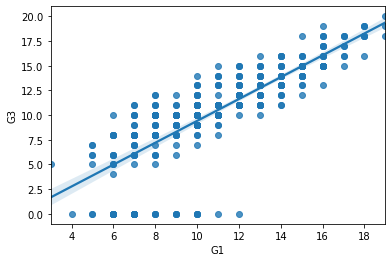

In [229]:
sns.regplot(maths['G1'],maths['G3'])

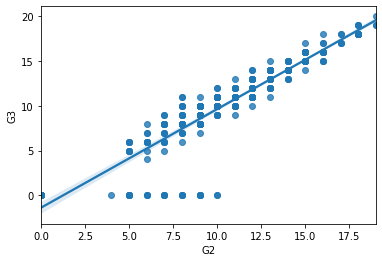

In [230]:
sns.regplot(maths['G2'],maths['G3'])

In [231]:
X=maths.drop(['G3'],axis=1).values
y=maths['G3']

In [232]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [233]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
lr.score(Xtrain,ytrain)

0.8625836013377511

In [234]:
lr.score(Xtest,ytest)

0.7886534225517151

In [235]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(Xtrain,ytrain)
rd.score(Xtrain,ytrain)

0.8625515065887354

In [236]:
rd.score(Xtest,ytest)

0.7897019296284136

In [237]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.01)
ls.fit(Xtrain,ytrain)
ls.score(Xtrain,ytrain)

0.8607026886668975

In [238]:
ls.score(Xtest,ytest)

0.7970930210455376

In [239]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(Xtrain,ytrain)
DTR.score(Xtrain,ytrain)

1.0

In [240]:
DTR.score(Xtest,ytest)

0.8312018326354755

In [241]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=75)
RFR.fit(Xtrain,ytrain)
RFR.score(Xtrain,ytrain)

0.9856677630834553

In [242]:
RFR.score(Xtest,ytest)

0.8706226002566679

In [243]:
from sklearn.ensemble import VotingRegressor
estimators=[('lr',lr),('rd',rd),('ls',ls),('DTR',DTR),('RFR',RFR)]
ens=VotingRegressor(estimators=estimators)
ens.fit(Xtrain,ytrain)
ens.score(Xtrain,ytrain)


0.941493656619331

In [244]:
ens.score(Xtest,ytest)

0.8525841918172693